In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from scipy.optimize import curve_fit
from lab_lib import *


In [2]:

def make_plot_with_3mnk(file, title, xlabel, ylabel, x, y, dx, dy, k_b1, k_b2, k_b3):

    mpl.rcParams['font.size'] = 16                   # Управление стилем, в данном случаем - размером шрифта
    plt.figure(figsize = (10,8), facecolor = "white") # Создаем фигуру

    # Подписываем оси и график
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

    #plt.errorbar(x, y, "or", markersize = 9, label = 'Экспериментальные значения')
    plt.errorbar(x, y, xerr = dx, yerr = dy, fmt='.r', label = 'Экспериментальные значения')
    #plt.plot(x, y, "+b", label = "Экспериментальные данные", linewidth = 1)

    x_lin = np.linspace(min(x), max(x), 1000)
    y_lin = np.linspace(min(y), max(y), 1000)
    plt.plot([(i - k_b3[1][0]) / k_b3[0][0] for i in y_lin], y_lin, "r", label = "Касательная 5мА")
    plt.plot([(i - k_b2[1][0]) / k_b2[0][0] for i in y_lin], y_lin, "g", label = "Касательная 3мА")
    plt.plot(x_lin, [i * k_b1[0][0] + k_b1[1][0] for i in x_lin], "b", label = "Касательная 1,5мА")

    plt.grid(visible = True, which = 'major', axis = 'both', alpha = 1, linewidth = 0.9)   # Активируем сетку
    plt.grid(visible = True, which = 'minor', axis = 'both', alpha = 0.5, linestyle = ':')

    plt.minorticks_on()
    plt.tight_layout()
    plt.legend(loc = "best", fontsize = 12) # Активируем легенду графика

    plt.savefig("{}".format(file))
    plt.show()


k: (-0.32161286436158126 +- 0.012527432183312889)
b: (11.703918151355772 +- 0.38912686342978553)
k: (-3.0628571590736877 +- 0.11930410288014258)
b: (36.310000028378944 +- 0.23231136553227377)
k: (-0.925925925925931 +- 0.2390731356790787)
b: (28.462962962963104 +- 6.446273608973573)
k: (-0.9000000000019698 +- 0.2323789825898141)
b: (30.110000000065696 +- 0.8199389403906029)
k: (-4.318181818181985 +- 1.2602885324138837)
b: (118.45454545454992 +- 33.35592755979679)
k: (-0.17272727272727517 +- 0.050411577651035266)
b: (27.186363636363648 +- 0.2118886068451501)


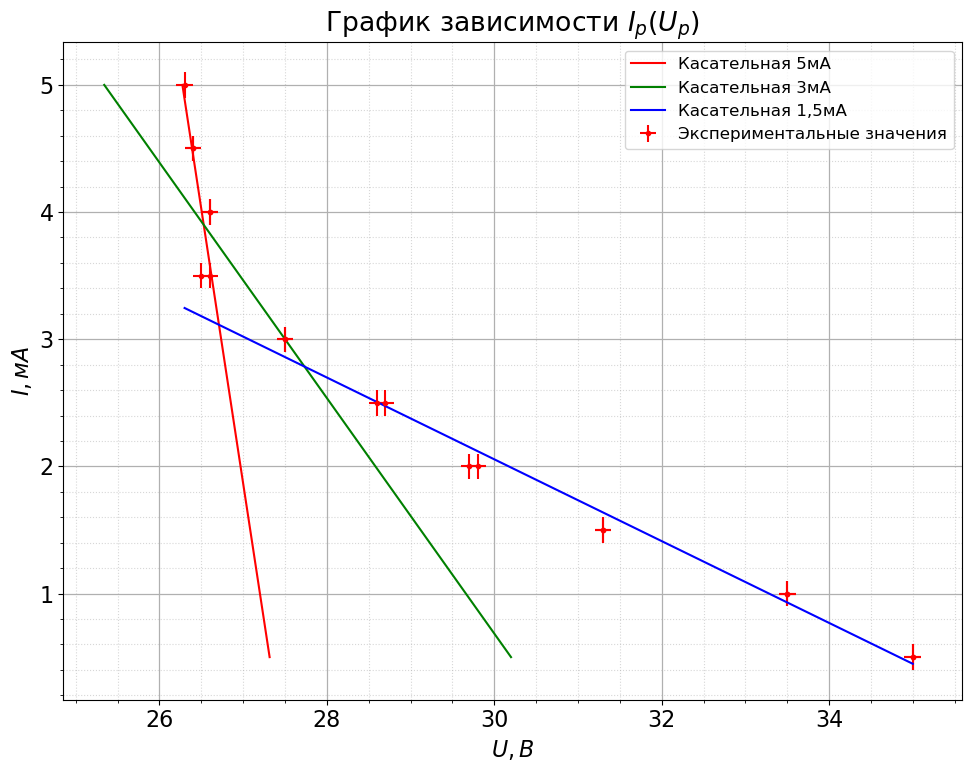

In [3]:
vah_plazma = [[[i[0], 0.1], [i[1], 0.1]] for i in pd.read_csv("data/vah_plazma.csv").to_numpy()]

vah_plazma.sort()

vah_plazma_15ma = vah_plazma[7:]
vah_plazma_3ma  = vah_plazma[4:9]
vah_plazma_5ma  = vah_plazma[0:6]

def plazma_mnk(vah):
    return mnk([i[0][0] for i in vah], [i[1][0] for i in vah]), mnk([i[1][0] for i in vah], [i[0][0] for i in vah])

vah_plazma_k_plot_15ma, vah_plazma_k_15ma = plazma_mnk(vah_plazma_15ma)
vah_plazma_k_plot_3ma, vah_plazma_k_3ma = plazma_mnk(vah_plazma_3ma)
vah_plazma_k_plot_5ma, vah_plazma_k_5ma = plazma_mnk(vah_plazma_5ma)

make_plot_with_3mnk("img/vah_plazma.png", "График зависимости $I_p(U_p)$", "$U, В$", "$I, мА$",
                    [i[0][0] for i in vah_plazma], [i[1][0] for i in vah_plazma], [i[0][1] for i in vah_plazma], [i[1][1] for i in vah_plazma],
                    vah_plazma_k_plot_15ma, vah_plazma_k_plot_3ma, vah_plazma_k_plot_5ma)

R_dif = [vah_plazma_k_5ma[0], vah_plazma_k_3ma[0], vah_plazma_k_15ma[0]]

for i in range(len(R_dif)):
    R_dif[i] = [abs(R_dif[i][0]), R_dif[i][1]]

In [4]:
from math import isfinite


vah_zond = []

for i in range(0, 7, 3):
    vah_zond.append([j[i:i+2] for j in pd.read_csv("data/vah_zond.csv").to_numpy()])

vah_mean = []

for i in vah_zond:
    vah_mean.append(np.mean([j[1] for j in i[1:]]))

for i in range(len(vah_zond)):
    for j in range(len(vah_zond[i])):
        vah_zond[i][j][1] -= vah_mean[i]

In [5]:
def make_plot_with_3mnk_and_intersections(file, title, xlabel, ylabel, x, y, dx, dy, k_b1, k_b2, k_b3):

    mpl.rcParams['font.size'] = 16                   # Управление стилем, в данном случаем - размером шрифта
    plt.figure(figsize = (10,8), facecolor = "white") # Создаем фигуру

    # Подписываем оси и график
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

    #plt.errorbar(x, y, "or", markersize = 9, label = 'Экспериментальные значения')
    plt.errorbar(x, y, xerr = dx, yerr = dy, fmt='.r', label = 'Экспериментальные значения')
    #plt.plot(x, y, "+b", label = "Экспериментальные данные", linewidth = 1)

    x_lin = np.linspace(min(x), max(x), 1000)
    y_lin = np.linspace(min(y), max(y), 1000)
    plt.plot(x_lin, [i * k_b1[0][0] + k_b1[1][0] for i in x_lin], "b", label = "Аппроксимация")
    plt.plot(x_lin, [i * k_b2[0][0] + k_b2[1][0] for i in x_lin], "b")
    plt.plot([(i - k_b3[1][0]) / k_b3[0][0] for i in y_lin], y_lin, "b")

    plt.errorbar(0, k_b1[1][0], yerr=k_b1[1][1], fmt='xg', markersize=10, label = "$I_{iH}$")
    plt.errorbar(0, k_b2[1][0], yerr=k_b2[1][1], fmt='xg', markersize=10)

    plt.annotate(texAns(k_b1[1]), (0, k_b1[1][0]))
    plt.annotate(texAns(k_b2[1]), (0, k_b2[1][0]))

    plt.grid(visible = True, which = 'major', axis = 'both', alpha = 1, linewidth = 0.9)   # Активируем сетку
    plt.grid(visible = True, which = 'minor', axis = 'both', alpha = 0.5, linestyle = ':')

    plt.minorticks_on()
    plt.tight_layout()
    plt.legend(loc = "best", fontsize = 12) # Активируем легенду графика

    plt.savefig("{}".format(file))
    plt.show()


k: (1.2949076904423948 +- 0.14065807409045716)
b: (-87.30015951793351 +- 3.149110372899762)
k: (1.132915068495451 +- 0.11176568696700624)
b: (89.60590567118574 +- 2.320989652297224)
k: (13.311852091349058 +- 2.8162841177274576)
b: (-0.1924557279226832 +- 6.42862693753094)


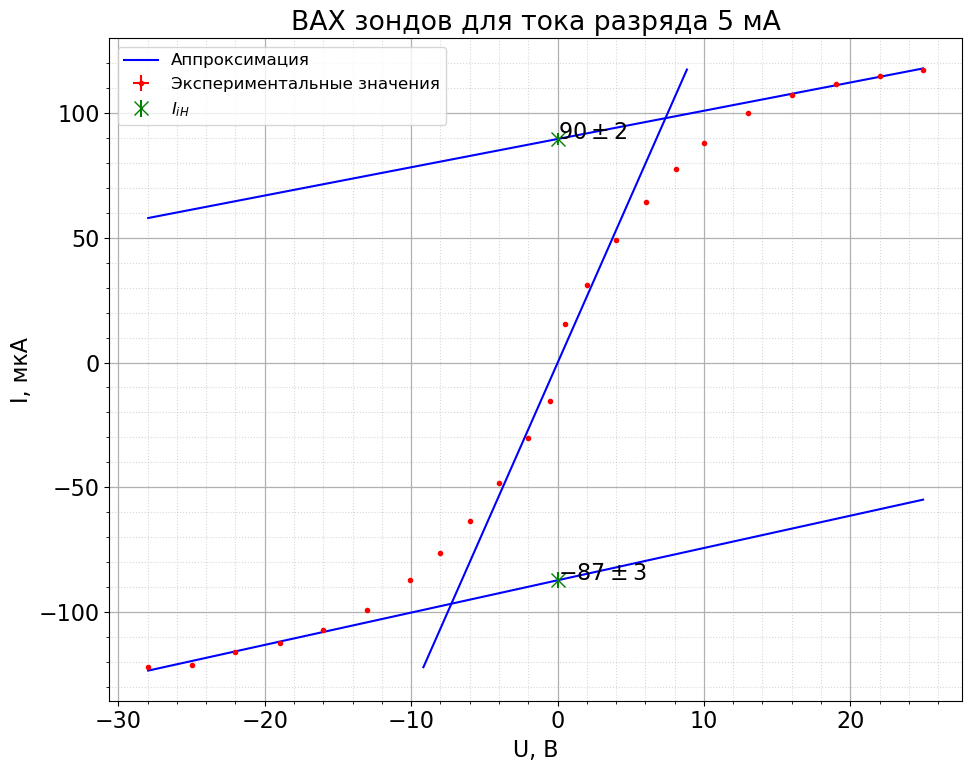

In [6]:
vah_zond_5ma_xy = sorted([[i[0], i[1]] for i in vah_zond[0] if isfinite(i[0])])

vah_zond_5ma_x = [i[0] for i in vah_zond_5ma_xy]
vah_zond_5ma_y = [i[1] for i in vah_zond_5ma_xy]

vah_zond_5ma_k_b = [mnk(vah_zond_5ma_x[:5], vah_zond_5ma_y[:5]), mnk(vah_zond_5ma_x[-4:], vah_zond_5ma_y[-4:]),
                    mnk(vah_zond_5ma_x[11:15], vah_zond_5ma_y[11:15])]

make_plot_with_3mnk_and_intersections("img/vah_zond_5ma.png", "ВАХ зондов для тока разряда 5 мА", "U, В", "I, мкА",
                    vah_zond_5ma_x, vah_zond_5ma_y,
                    [0.01]*len(vah_zond_5ma_x), [0.1]*len(vah_zond_5ma_x), vah_zond_5ma_k_b[0], vah_zond_5ma_k_b[1],
                                                                           vah_zond_5ma_k_b[2])

k: (0.7522874718120625 +- 0.028705567995865315)
b: (-50.88233959809145 +- 0.5966697542046976)
k: (0.6498381522229608 +- 0.02784286412612327)
b: (52.07506015730896 +- 0.5789921181410157)
k: (7.1953906636837495 +- 0.7568623547317634)
b: (0.4283352098229156 +- 1.7251355762664395)


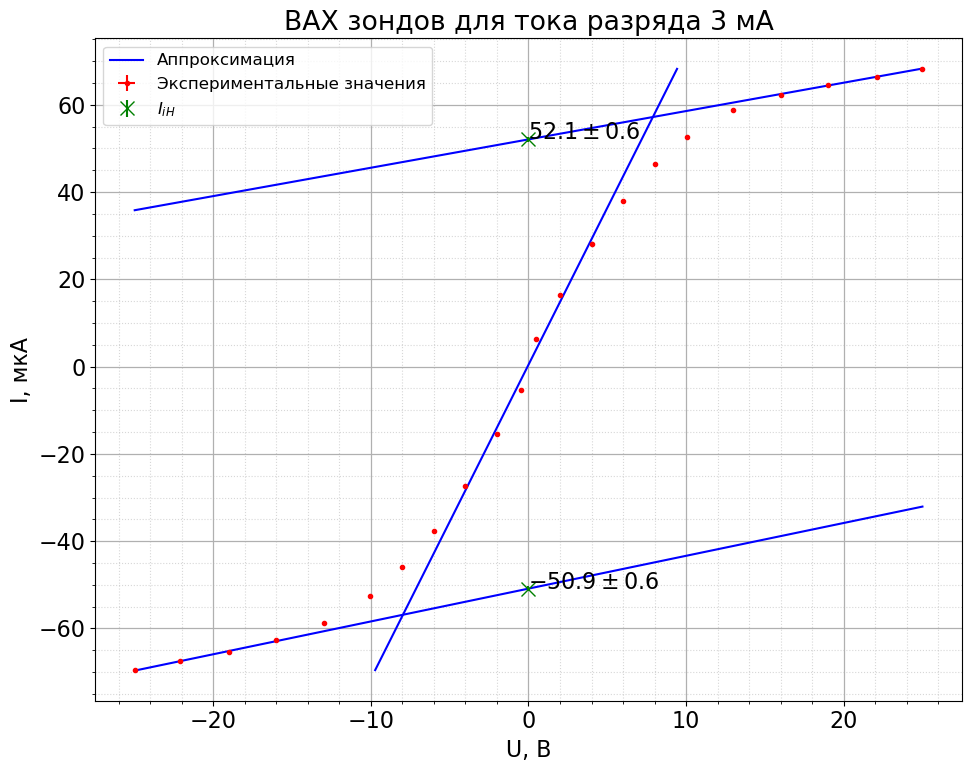

In [7]:
vah_zond_3ma_xy = sorted([[i[0], i[1]] for i in vah_zond[1] if isfinite(i[0])])

vah_zond_3ma_x = [i[0] for i in vah_zond_3ma_xy]
vah_zond_3ma_y = [i[1] for i in vah_zond_3ma_xy]

vah_zond_3ma_k_b = [mnk(vah_zond_3ma_x[:4], vah_zond_3ma_y[:4]), mnk(vah_zond_3ma_x[-4:], vah_zond_3ma_y[-4:]),
                    mnk(vah_zond_3ma_x[10:14], vah_zond_3ma_y[10:14])]

make_plot_with_3mnk_and_intersections("img/vah_zond_3ma.png", "ВАХ зондов для тока разряда 3 мА", "U, В", "I, мкА",
                    vah_zond_3ma_x, vah_zond_3ma_y,
                    [0.01]*len(vah_zond_3ma_x), [0.1]*len(vah_zond_3ma_x), vah_zond_3ma_k_b[0], vah_zond_3ma_k_b[1],
                                                                           vah_zond_3ma_k_b[2])

k: (0.4284771148079781 +- 0.0057631853905623824)
b: (-24.65804062918178 +- 0.11987811788807233)
k: (0.3671355934801467 +- 0.0019452927308626978)
b: (25.588230795908924 +- 0.04042656868252222)
k: (3.686141132633965 +- 0.19077219205570073)
b: (0.14161617883649033 +- 0.4308337418691594)


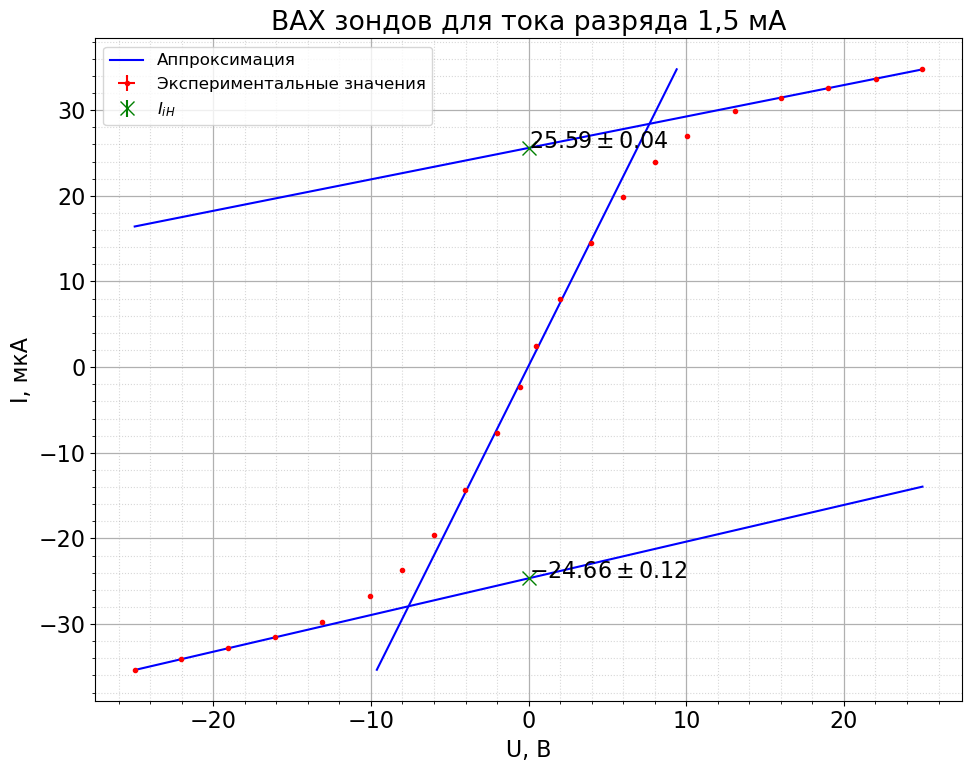

In [8]:
vah_zond_15ma_xy = sorted([[i[0], i[1]] for i in vah_zond[2] if isfinite(i[0])])

vah_zond_15ma_x = [i[0] for i in vah_zond_15ma_xy]
vah_zond_15ma_y = [i[1] for i in vah_zond_15ma_xy]

vah_zond_15ma_k_b = [mnk(vah_zond_15ma_x[:4], vah_zond_15ma_y[:4]), mnk(vah_zond_15ma_x[-4:], vah_zond_15ma_y[-4:]),
                     mnk(vah_zond_15ma_x[10:14], vah_zond_15ma_y[10:14])]

make_plot_with_3mnk_and_intersections("img/vah_zond_15ma.png", "ВАХ зондов для тока разряда 1,5 мА", "U, В", "I, мкА",
                    vah_zond_15ma_x, vah_zond_15ma_y,
                    [0.01]*len(vah_zond_15ma_x), [0.1]*len(vah_zond_15ma_x), vah_zond_15ma_k_b[0], vah_zond_15ma_k_b[1],
                    vah_zond_15ma_k_b[2])

In [9]:
vah_zond_k_b = [vah_zond_5ma_k_b, vah_zond_3ma_k_b, vah_zond_15ma_k_b]

I_iH = []

for i in vah_zond_k_b:
    I_iH.append(meanWithInacc([[abs(i[0][1][0]), i[0][1][1]], [abs(i[1][1][0]), i[1][1][1]]]))

Delta_U = []

for i in vah_zond_k_b:
    val = []
    for j in range(2):
        value = abs((i[j][1][0] - i[2][1][0]) / i[2][0][0])
        inacc = np.sqrt((i[j][1][0] / i[2][0][0])**2 * ((i[j][1][1]/i[j][1][0])**2 + (i[2][0][1] / i[2][0][0])**2) +
                        (i[2][1][0] / i[2][0][0])**2 * ((i[2][1][1]/i[2][1][0])**2 + (i[2][0][1] / i[2][0][0])**2))
        val.append([value, inacc])

    Delta_U.append(meanWithInacc(val))

kT_e_1 = []
kT_e_2 = []

for i in range(len(vah_zond_k_b)):
    kT_e_1.append(countWithSigma(1/2 * I_iH[i][0] / vah_zond_k_b[i][2][0][0], [I_iH[i], vah_zond_k_b[i][2][0]]))
    kT_e_2.append(countWithSigma(Delta_U[i][0] / 2, [Delta_U[i]]))

T_e = []
for i in kT_e_1:
    T_e.append([j * 11800 for j in i])

print(kT_e_1)
print(kT_e_2)
print(T_e)

[[3.322341323640547, 0.7116679048423771], [3.57719978551833, 0.38074789160005434], [3.40778266601439, 0.18762504199676855]]
[[3.322341323640547, 0.7521570171535071], [3.5771997855183297, 0.3972043539480119], [3.40778266601439, 0.19130239259172982]]
[[39203.62761895845, 8397.68127714005], [42210.95746911629, 4492.825120880641], [40211.8354589698, 2213.9754955618687]]


In [10]:
table = [[r"$I_{разр}$", r"$5~мА$", r"$3~мА$", r"1,5~мА"],
         [r"$R_{диф}, кОм$"] + [texAns(i) for i in R_dif],
         [r"$I_iH, мкА$"]    + [texAns(i) for i in I_iH],
         [r"$\Delta U, В$"]  + [texAns(i) for i in Delta_U],
         [r"$kT_{e_1}, эВ$"] + [texAns(i) for i in kT_e_1],
         [r"$kT_{e_2}, эВ$"] + [texAns(i) for i in kT_e_2],
         [r"$T_e, К$"]       + [texAns(i) for i in T_e]]

texTable(table)



\begin{table}[!ht]
    \centering
    \begin{tabular}{|c|c|c|c|}
        \hline

        $I_{разр}$ & $5~мА$ & $3~мА$ & 1,5~мА\\ \hline
        $R_{диф}, кОм$ & $0.17 \pm 0.05$ & $0.9 \pm 0.2$ & $3.06 \pm 0.12$\\ \hline
        $I_iH, мкА$ & $88 \pm 3$ & $51.5 \pm 0.8$ & $25.1 \pm 0.5$\\ \hline
        $\Delta U, В$ & $7 \pm 2$ & $7.2 \pm 0.8$ & $6.8 \pm 0.4$\\ \hline
        $kT_{e_1}, эВ$ & $3.3 \pm 0.7$ & $3.6 \pm 0.4$ & $3.4 \pm 0.2$\\ \hline
        $kT_{e_2}, эВ$ & $3.3 \pm 0.8$ & $3.6 \pm 0.4$ & $3.4 \pm 0.2$\\ \hline
        $T_e, К$ & $39000 \pm 8000$ & $42000 \pm 4000$ & $40000 \pm 2000$\\ \hline

    \end{tabular}
    \caption{}
    \label{}
\end{table}



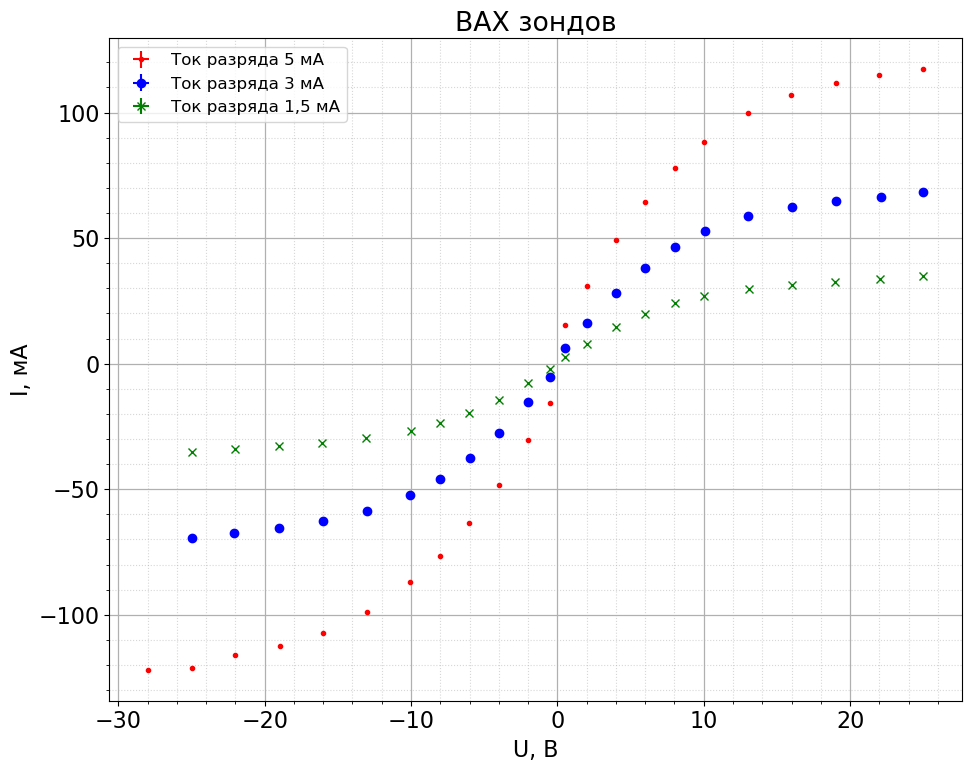

In [11]:
mpl.rcParams['font.size'] = 16                   # Управление стилем, в данном случаем - размером шрифта
plt.figure(figsize = (10,8), facecolor = "white") # Создаем фигуру

# Подписываем оси и график
plt.title("ВАХ зондов")
plt.ylabel("I, мА")
plt.xlabel("U, В")

plt.errorbar(vah_zond_5ma_x, vah_zond_5ma_y, xerr = [0.01]*len(vah_zond_5ma_x), yerr = [0.1]*len(vah_zond_5ma_y),
             fmt='.r', label = 'Ток разряда 5 мА')

plt.errorbar(vah_zond_3ma_x, vah_zond_3ma_y, xerr = [0.01]*len(vah_zond_3ma_x), yerr = [0.1]*len(vah_zond_3ma_y),
             fmt='ob', label = 'Ток разряда 3 мА')

plt.errorbar(vah_zond_15ma_x, vah_zond_15ma_y, xerr = [0.01]*len(vah_zond_15ma_x), yerr = [0.1]*len(vah_zond_15ma_y),
             fmt='xg', label = 'Ток разряда 1,5 мА')

plt.grid(visible = True, which = 'major', axis = 'both', alpha = 1, linewidth = 0.9)   # Активируем сетку
plt.grid(visible = True, which = 'minor', axis = 'both', alpha = 0.5, linestyle = ':')

plt.minorticks_on()
plt.tight_layout()
plt.legend(loc = "best", fontsize = 12) # Активируем легенду графика

plt.savefig("img/vah_zond.png")
plt.show()

In [12]:
e = -1.602 * 10**(-19)
d = [i * 10**(-3) for i in [0.2, 0.01]]
l = [i * 10**(-3) for i in [5.2, 0.01]]
S = countWithSigma(np.pi * d[0] * l[0], [d, l])
m_i = 22 * 1.66 * 10**(-27)

n_e = []

for i in range(len(I_iH)):
    I, kT = I_iH[i], kT_e_1[i]
    n_e.append(countWithSigma(1 / 0.4 * (I[0] * 10**(-6)) / (-e) / S[0] / np.sqrt(2 * kT[0] * (-e) / m_i), [I, S, [kT[0], kT[1] * 1/2]]))

omega_p = []

for i in n_e:
    omega_p.append(countWithSigma(5.6 * 10**4 * np.sqrt(i[0] * 10**-6), [[i[0], i[1] * 1/2]]))

r_D_e = []

for i in range(len(kT_e_1)):
    kT_e_i = [j * 1.6*10**-12 for j in kT_e_1[i]]
    n_e_i  = [j * 10**-6 for j in n_e[i]]
    r_D_e.append(countWithSigma(np.sqrt(kT_e_i[0] / (4*np.pi*n_e_i[0]*((4.8032067991251*10**-10)**2))), [[kT_e_i[0], kT_e_i[1] * 1/2], [n_e_i[0], n_e_i[1] * 1/2]]))

r_D = []

for i in range(len(kT_e_1)):
    kT_i_i = 300 / 11800 * 1.6*10**-12
    n_e_i  = [j * 10**-6 for j in n_e[i]]
    r_D.append(countWithSigma(np.sqrt(kT_i_i / (4*np.pi*n_e_i[0]*((4.8032067991251*10**-10)**2))), [[n_e_i[0], n_e_i[1] * 1/2]]))

N_D = []

for i in range(len(kT_e_1)):
    r_D_i = r_D[i]
    n_e_i = [j * 10**-6 for j in n_e[i]]
    N_D.append(countWithSigma(4/3 * np.pi * r_D_i[0]**3 * n_e_i[0], [n_e_i, r_D_i]))

alpha = []

for i in range(len(kT_e_1)):
    kT_i_i = 300 / 11800 * 1.6*10**-12
    n_i_i = [j * 10**-6 for j in n_e[i]]
    P = 2666.45
    n = P / kT_i_i
    alpha.append(countWithSigma(n_i_i[0] / n, [n_i_i]))

table_full = table + [[r"$n_e, 10^{-9} см^{-3}$"]           + [texAns([j*10**(-6-9) for j in i]) for i in n_e],
                      [r"$\omega_p, 10^9 \frac{рад}{сек}$"] + [texAns([j*10**(-9)   for j in i]) for i in omega_p],
                      [r"$r_{D_e}, 10^{-3} см$"]            + [texAns([j*10**(3)    for j in i]) for i in r_D_e],
                      [r"$r_D, 10^{-3} см$"]                + [texAns([j*10**(3)    for j in i]) for i in r_D],
                      [r"$N_D$"]                            + [texAns([j            for j in i]) for i in N_D],
                      [r"$\alpha, 10^{-7}$"]                + [texAns([j*10**(7)    for j in i]) for i in alpha]]

texTable(table_full)



\begin{table}[!ht]
    \centering
    \begin{tabular}{|c|c|c|c|}
        \hline

        $I_{разр}$ & $5~мА$ & $3~мА$ & 1,5~мА\\ \hline
        $R_{диф}, кОм$ & $0.17 \pm 0.05$ & $0.9 \pm 0.2$ & $3.06 \pm 0.12$\\ \hline
        $I_iH, мкА$ & $88 \pm 3$ & $51.5 \pm 0.8$ & $25.1 \pm 0.5$\\ \hline
        $\Delta U, В$ & $7 \pm 2$ & $7.2 \pm 0.8$ & $6.8 \pm 0.4$\\ \hline
        $kT_{e_1}, эВ$ & $3.3 \pm 0.7$ & $3.6 \pm 0.4$ & $3.4 \pm 0.2$\\ \hline
        $kT_{e_2}, эВ$ & $3.3 \pm 0.8$ & $3.6 \pm 0.4$ & $3.4 \pm 0.2$\\ \hline
        $T_e, К$ & $39000 \pm 8000$ & $42000 \pm 4000$ & $40000 \pm 2000$\\ \hline
        $n_e, 10^{-9} см^{-3}$ & $78 \pm 10$ & $44 \pm 3$ & $22 \pm 1$\\ \hline
        $\omega_p, 10^9 \frac{рад}{сек}$ & $15.7 \pm 1.0$ & $11.7 \pm 0.4$ & $8.3 \pm 0.2$\\ \hline
        $r_{D_e}, 10^{-3} см$ & $4.8 \pm 0.6$ & $6.7 \pm 0.4$ & $9.3 \pm 0.4$\\ \hline
        $r_D, 10^{-3} см$ & $0.42 \pm 0.03$ & $0.57 \pm 0.02$ & $0.80 \pm 0.02$\\ \hline
        $N_D$ & $25 \pm 3$ &

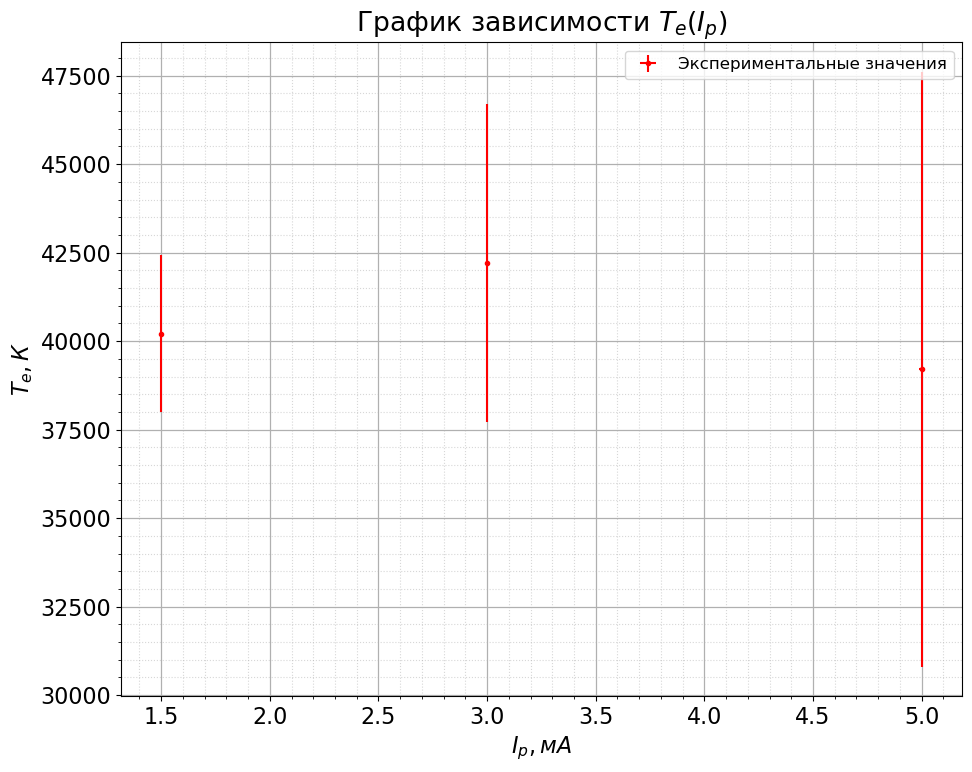

In [13]:
make_plot_no_mnk("img/T_e_I_p", "График зависимости $T_e(I_p)$", "$I_p, мА$", "$T_e, К$", [5, 3, 1.5], [i[0] for i in T_e], [0.01] * 3, [i[1] for i in T_e])

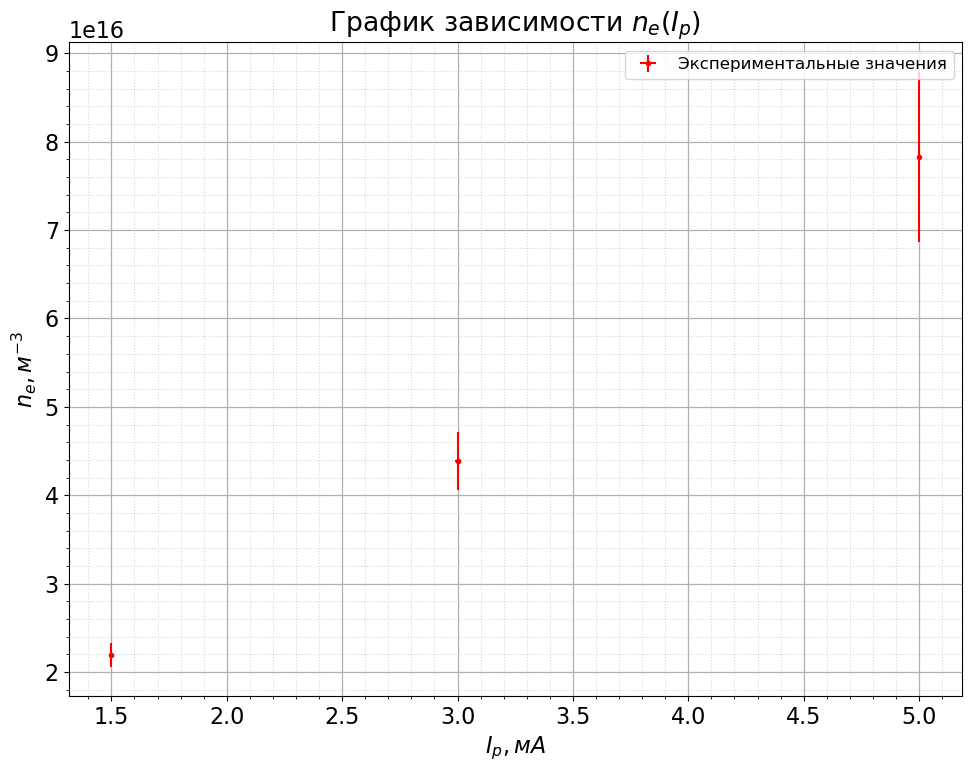

In [16]:
make_plot_no_mnk("img/n_e_I_p", "График зависимости $n_e(I_p)$", "$I_p, мА$", "$n_e, м^{-3}$", [5, 3, 1.5], [i[0] for i in n_e], [0.01] * 3, [i[1] for i in n_e])